In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
UH = 27
I0 = 0.07
nH = 6000
MH = 10
IH = 0.36
MP = 87

In [ ]:
x = np.linspace(0, 87, 100)
print(x)

In [12]:
def P2(M, nP):
    global nH, MH, MP 
    return np.pi/30 * (M * (nH - MH * ((nH - nP)/(MH - MP))) + (nH - nP)/(MH - MP) * M**2)

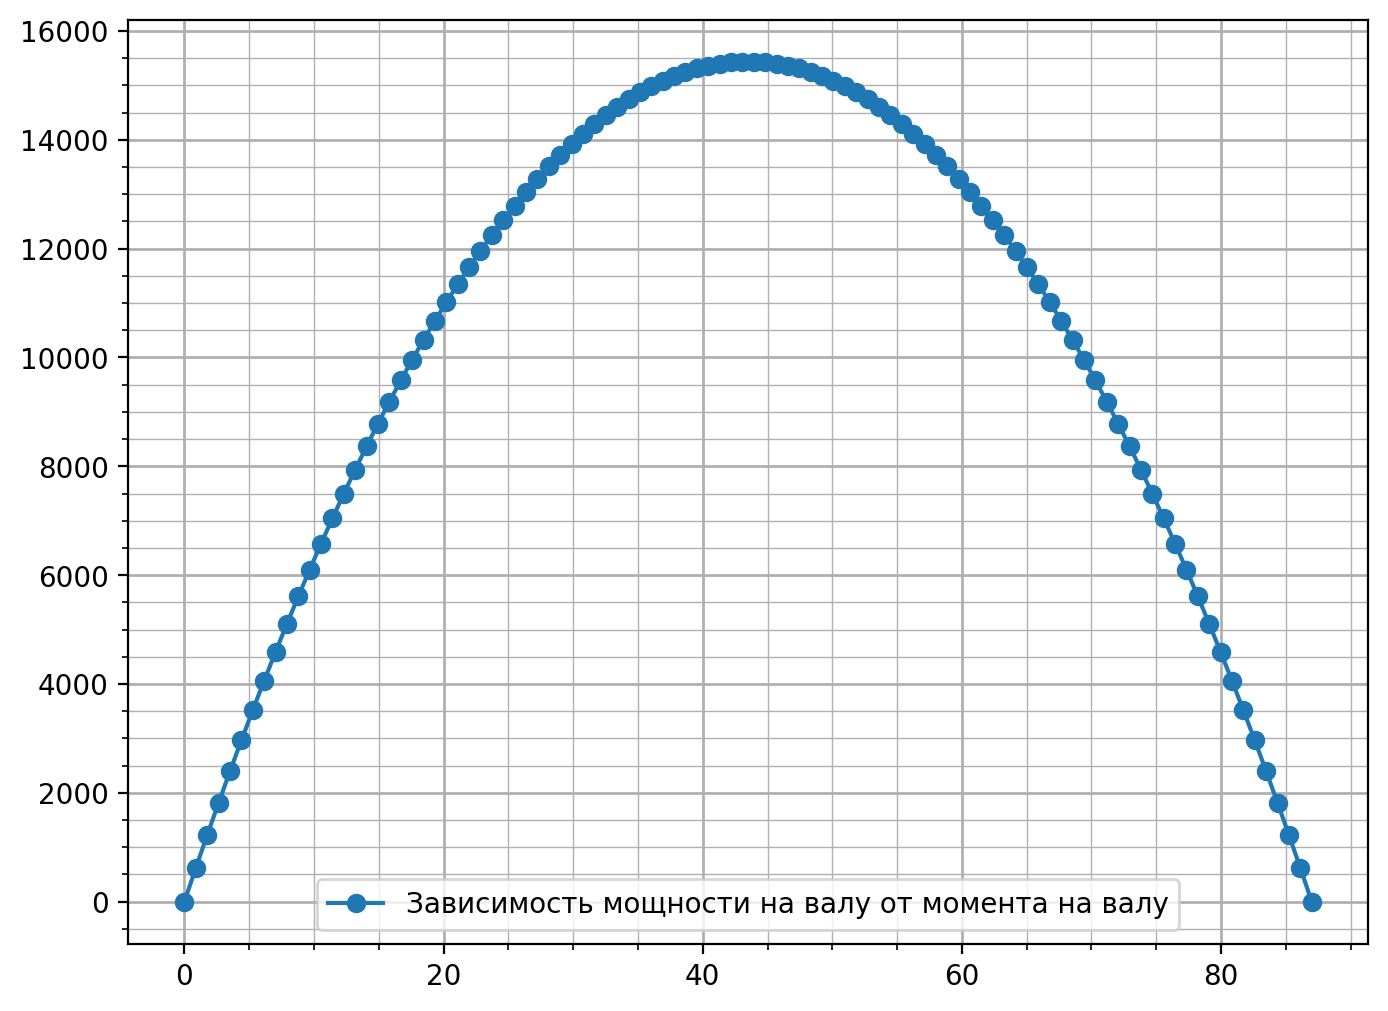

In [13]:
plt.grid()
plt.plot(x, P2(x, 0))